<a href="https://colab.research.google.com/github/ruchiraravishankar/level-5-project/blob/main/iam_dataset_binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import torch
import glob
import os

from bs4 import BeautifulSoup
# data_path = '/Users/ruchiraravishankar/Downloads/iam_dataset/'
data_path = '/content/drive/MyDrive/iam_dataset/'

# print(glob.glob(data_path))

In [3]:
# path = '/Users/ruchiraravishankar/Downloads/iam_dataset/xml/*'
path = data_path + 'xml/*'
xml_path = glob.glob(path)
print(len(xml_path))

1539


In [4]:
# # for file in xml_path:
# # file = xml_path[0]
# # print(file)
# d = {}
# d_i = {}
# def get_form_metadata(file):
#     with open(file, 'r') as f:
#         data = f.read()
#     Bs_data = BeautifulSoup(data, "lxml")
#     form = Bs_data.find('form')
#     form_id = form.get('id')
#     writer_id = form.get('writer-id')
# #     print(form_id)
# #     print(writer_id)
#     d[writer_id] = form_id
#     d_i[form_id] = writer_id
# for file in xml_path:
#     get_form_metadata(file)
    
# print(d)
# print(d_i)


In [5]:
import pickle
# a_file = open("/content/drive/MyDrive/iam_dataset/d.pkl", "wb")
# pickle.dump(d, a_file)
# a_file.close()

# b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "wb")
# pickle.dump(d_i, b_file)
# b_file.close()

In [6]:
print(os.listdir(os.curdir))

['.config', 'drive', 'results.csv', 'pred.csv', 'sample_data']


In [7]:

# a_file = open("/content/drive/MyDrive/iam_dataset/d.pkl", "rb")
# d = pickle.load(a_file)
# print(d)

b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "rb")
d_i = pickle.load(b_file)
print(d_i)

{'e01-062': '213', 'e01-059': '213', 'e01-086': '214', 'e01-092': '215', 'e01-102': '215', 'e01-113': '216', 'e01-107': '216', 'e02-014': '219', 'e01-119': '217', 'e02-000': '218', 'e02-018': '220', 'e02-021': '221', 'e02-025': '222', 'e02-074': '223', 'e02-082': '224', 'e02-086': '225', 'e02-091': '226', 'e02-094': '227', 'e02-100': '228', 'e02-117': '229', 'e04-000': '158', 'e04-008': '230', 'e04-011': '231', 'e04-004': '230', 'e04-015': '231', 'e04-022': '232', 'e04-019': '232', 'e04-026': '233', 'e04-030': '233', 'e04-038': '234', 'e04-034': '234', 'e04-052': '235', 'e04-043': '235', 'e04-058': '236', 'e04-062': '237', 'e04-079': '238', 'e04-068': '237', 'e04-083': '239', 'e04-086': '240', 'e04-091': '241', 'e04-095': '241', 'e04-109': '242', 'e04-103': '242', 'e04-099': '241', 'e04-114': '242', 'e04-119': '243', 'e04-124': '243', 'e04-127': '243', 'e04-132': '241', 'e06-000': '206', 'e06-006': '202', 'e06-003': '204', 'e06-021': '206', 'e06-010': '203', 'e06-015': '204', 'e06-030'

In [8]:
form_writer_list = list(d_i.items())

In [9]:
from collections import Counter

top_writers = []
num_writers = 50 # taking the top 50 writers
writers_counter = Counter(d_i.values())
for writer_id,_ in writers_counter.most_common(num_writers):
    top_writers.append(writer_id)

print(top_writers)

['000', '384', '551', '552', '588', '635', '670', '671', '152', '150', '151', '154', '153', '333', '334', '336', '337', '338', '339', '340', '341', '342', '343', '345', '344', '347', '346', '348', '349', '634', '155', '332', '335', '315', '118', '415', '209', '085', '567', '206', '202', '204', '203', '205', '207', '208', '247', '248', '273', '274']


In [10]:
top_forms = []
for form_id, author_id in d_i.items():
    if author_id in top_writers:
        top_forms.append(form_id)
print(top_forms)

['e06-000', 'e06-006', 'e06-003', 'e06-021', 'e06-010', 'e06-015', 'e06-030', 'e06-026', 'e06-033', 'e06-037', 'e06-046', 'e06-041', 'e06-053', 'e06-049', 'e07-000', 'e06-070', 'e07-079', 'e07-076', 'e07-086', 'e07-083', 'e07-090', 'e07-094', 'e07-105', 'e07-098', 'e07-101', 'e07-108', 'f04-007', 'f04-020', 'g03-049', 'g04-007', 'g04-011', 'g04-014', 'g04-017', 'g04-026', 'g04-032', 'g04-095', 'g06-011a', 'g05-098', 'g06-011b', 'g06-011c', 'g06-011e', 'g06-011f', 'g06-011g', 'g06-011h', 'g06-011i', 'g06-011j', 'g06-011k', 'g06-011l', 'g06-011n', 'g06-011m', 'g06-011p', 'g06-011o', 'g06-018a', 'g06-011r', 'g06-018c', 'g06-018d', 'g06-018b', 'g06-018g', 'g06-018f', 'g06-018e', 'g06-018h', 'g06-018i', 'g06-018l', 'g06-018j', 'g06-018k', 'g06-018n', 'g06-018m', 'g06-018o', 'g06-018p', 'g06-018r', 'g06-026b', 'g06-026a', 'g06-026e', 'g06-026d', 'g06-026c', 'g06-026g', 'g06-026f', 'g06-026i', 'g06-026h', 'g06-026j', 'g06-026l', 'g06-026k', 'g06-026o', 'g06-026m', 'g06-026n', 'g06-026r', 'g06

In [11]:
# for key, value in sorted(top_forms.items()):
#     print(key, len([item for item in value if item])) 

In [12]:
import os
import glob
import shutil

# Create temp directory to save writers' forms in (assumes files have already been copied if the directory exists)
temp_sentences_path = data_path + "/temp_sentences"
if not os.path.exists(temp_sentences_path):
    os.makedirs(temp_sentences_path)
    # Copy forms that belong to the top 50 most common writers to the temp directory
    original_sentences_path = data_path + "/sentences/**/**/*.png"
    for file_path in glob.glob(original_sentences_path):
        image_name = file_path.split('/')[-1]  
        file_name, _ = os.path.splitext(image_name)
        form_id = '-'.join(file_name.split('-')[0:2])
        if form_id in top_forms:
            shutil.copy2(file_path, temp_sentences_path + "/" + image_name)

In [13]:
img_files = np.zeros((0), dtype=str)
print(img_files)
img_targets = np.zeros((0), dtype=str)
print(img_targets)
sentence_dict = {}
path_to_files = os.path.join(temp_sentences_path, '*')
for file_path in glob.glob(path_to_files):
    img_files = np.append(img_files, file_path)
    file_name, _ = os.path.splitext(file_path.split('/')[-1]  )
    form_id = '-'.join(file_name.split('-')[0:2])
    for key in d_i:
        if key == form_id:
            img_targets = np.append(img_targets, d_i[form_id])
#             sentence_dict[d_i[form_id]] = form_id

[]
[]


In [14]:
print(img_files.shape)
print(img_targets.shape)

print(Counter(img_targets).keys())
print(Counter(img_targets).values())

(4901,)
(4901,)
dict_keys(['551', '552', '567', '315', '588', '634', '635', '670', '671', '340', '339', '341', '342', '343', '344', '345', '346', '347', '348', '332', '333', '334', '335', '336', '337', '338', '349', '274', '118', '384', '415', '247', '248', '273', '150', '151', '152', '153', '154', '155', '202', '203', '204', '205', '206', '207', '208', '209', '085', '000'])
dict_values([129, 127, 87, 73, 133, 134, 95, 116, 129, 83, 91, 101, 95, 81, 99, 107, 105, 86, 87, 82, 104, 89, 71, 82, 75, 80, 84, 45, 52, 117, 87, 60, 54, 45, 104, 99, 101, 111, 108, 95, 63, 43, 60, 55, 50, 56, 53, 71, 54, 693])


In [15]:
sen_dict = {}

for i in range(len(img_targets)):
    if img_targets[i] not in sen_dict.keys():
        sen_dict[img_targets[i]] = [img_files[i]]
    else:
        sen_dict[img_targets[i]].append(img_files[i])

In [16]:
print(len(sen_dict['207']))

56


In [17]:
# print(len(sen_dict.values()))
number_of = []
writer_ids = []
for key, value in sorted(sen_dict.items()):
    writer_ids.append(key)
    number_of.append(len([item for item in value if item]))
print(len(writer_ids))


50


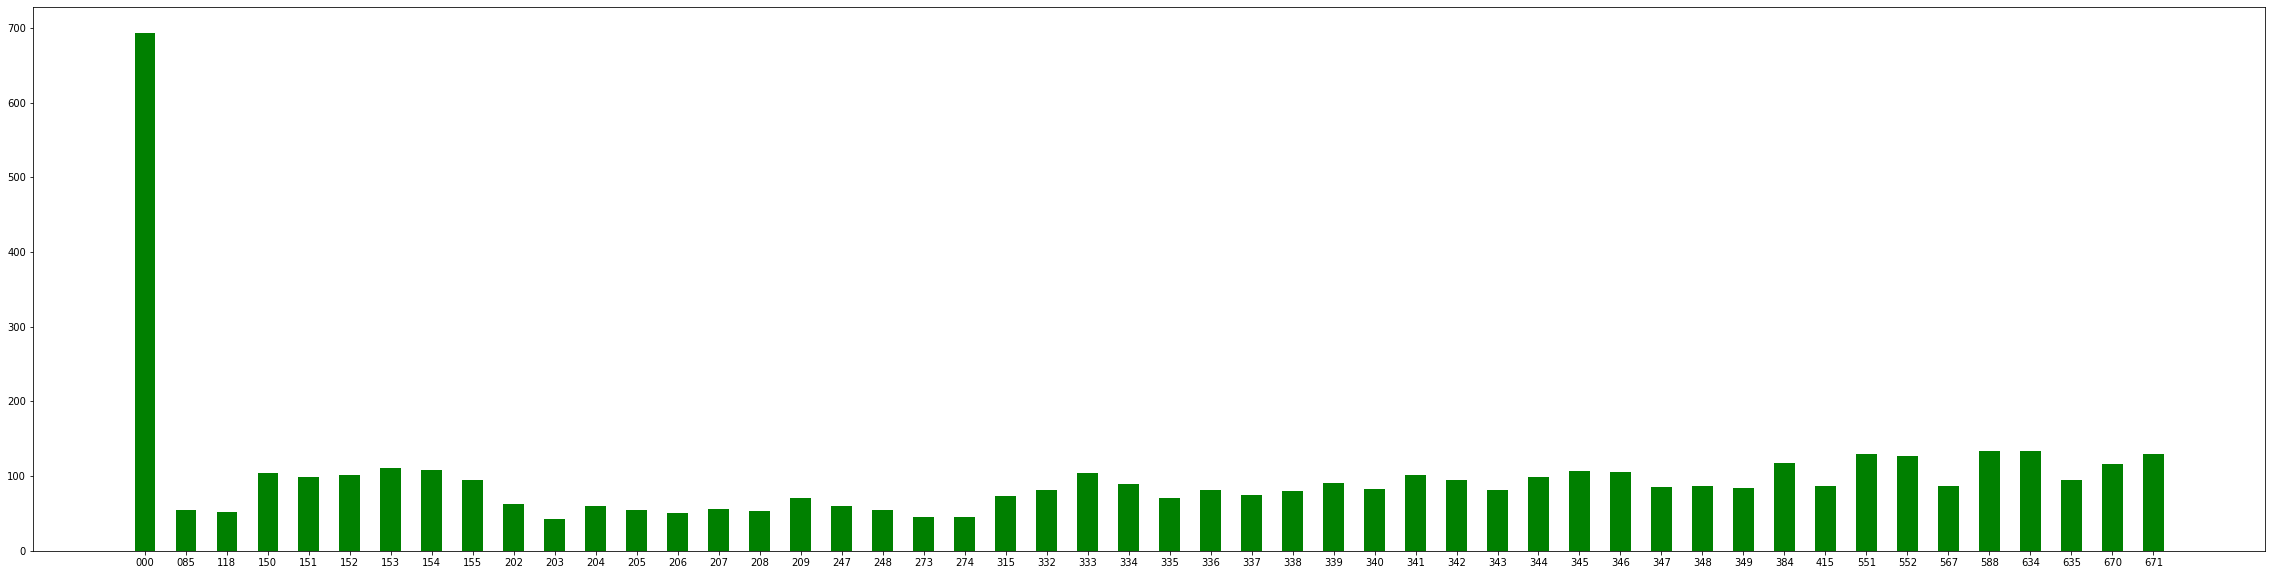

In [18]:
# crop so all images are of same size
# plot histogram 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(40,10))
plt.bar(writer_ids, number_of, width=0.5, color='g')
plt.show()

In [19]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline
# # img_files, img_targets
# img_shape_list = []
# for file_name in img_files:
#     img = mpimg.imread(file_name)
#     img_shape_list.append(img.shape)
#     plt.figure(figsize = (10,10))
#     plt.imshow(img, cmap ='gray')

In [20]:
# print(img_shape_list)

In [21]:
# arr = np.array(img_shape_list)
# print(arr.shape)

In [22]:
# print(arr.min(axis=0))

(47, 95)
(80, 1203)


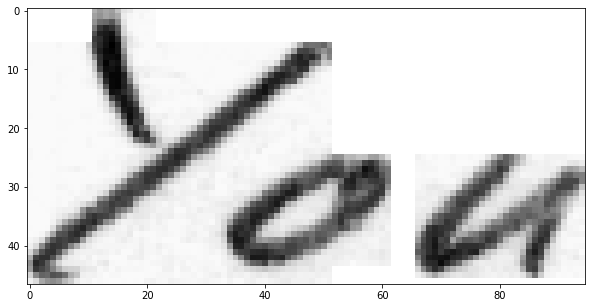

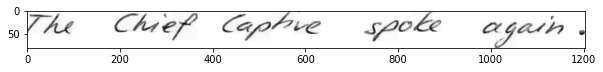

In [23]:
for file_name in img_files[:2]:
    img = mpimg.imread(file_name)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')
    print(img.shape)

In [24]:
# build a binary classifier on the writer id 000 and train on 0 and 1
# do the images have to be the same size???
# train test split => equal number of 0s and 1s (500 and 500)
# 1000 data points -> 900 to train and 100 to test

In [25]:
writer_0_files = np.array(sen_dict['000'][:500])
print(writer_0_files.shape)

writer_0 = np.c_[writer_0_files, np.zeros(500)]

print(writer_0.shape)

(500,)
(500, 2)


In [26]:
print(writer_0[0])

['/content/drive/MyDrive/iam_dataset//temp_sentences/a01-000u-s00-02.png'
 '0.0']


In [27]:
labelled_data = np.stack([img_files, img_targets], axis=1)

print(labelled_data.shape)

(4901, 2)


In [28]:
from sklearn.utils import shuffle
from PIL import Image
import random

CROP_SIZE = 113
NUM_LABELS = 50

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image 
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)
    
    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return images, labels

In [29]:
transformed, labels = get_augmented_sample(labelled_data[0,0], labelled_data[0,1],0.05)

In [30]:
print(len(transformed))

5


In [31]:
# plt.imshow(transformed[8], cmap ='gray')

In [32]:
labelled_data_0 = labelled_data[labelled_data[:,1] == '000']

print(labelled_data_0.shape)

labelled_data_0 = labelled_data_0[:196]
print(labelled_data_0.shape)

print(np.unique(labelled_data_0[:,1]))

(693, 2)
(196, 2)
['000']


In [33]:
writer_list = list(sen_dict.keys())

print(np.array(writer_list).shape)

print(writer_list)

(50,)
['551', '552', '567', '315', '588', '634', '635', '670', '671', '340', '339', '341', '342', '343', '344', '345', '346', '347', '348', '332', '333', '334', '335', '336', '337', '338', '349', '274', '118', '384', '415', '247', '248', '273', '150', '151', '152', '153', '154', '155', '202', '203', '204', '205', '206', '207', '208', '209', '085', '000']


In [34]:
remove_000 = labelled_data[labelled_data[:,1]!='000']

print(np.unique(remove_000[:,1]))
print(np.unique(remove_000[:,1]).shape)

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']
(49,)


In [35]:
y = [remove_000[remove_000[:,1]==k] for k in np.unique(remove_000[:,1])]
print(len(y))

49


In [36]:
labelled_data_1 = []
for i in y:
    labelled_data_1.append(i[:4])
print(len(labelled_data_1))

labelled_data_1 = np.array(labelled_data_1)

print(labelled_data_1.shape)

49
(49, 4, 2)


In [37]:
labelled_data_1=labelled_data_1.reshape(-1,2)

In [38]:
print(labelled_data_1.shape)

(196, 2)


In [39]:
print(np.unique(labelled_data_1[:,1]))

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']


In [40]:
print(labelled_data_1)

[['/content/drive/MyDrive/iam_dataset//temp_sentences/e07-000-s00-01.png'
  '085']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/e07-000-s00-02.png'
  '085']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/e07-000-s00-03.png'
  '085']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/e07-000-s00-00.png'
  '085']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/h05-012-s01-03.png'
  '118']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/h05-012-s00-01.png'
  '118']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/h05-012-s01-04.png'
  '118']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/h05-012-s00-00.png'
  '118']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/c03-007a-s01-03.png'
  '150']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/c03-007a-s01-05.png'
  '150']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/c03-016a-s02-01.png'
  '150']
 ['/content/drive/MyDrive/iam_dataset//temp_sentences/c03-016a-s02-00.png'
  '150']


In [41]:
labelled_data_new = np.concatenate((labelled_data_0, labelled_data_1))
np.random.shuffle(labelled_data_new)
print(labelled_data_new.shape) # mix of sentences from writer id 0 and others, labelled

(392, 2)


In [42]:
# split before augmenting to ensure the sentences are being split and not the augmented samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labelled_data_new[:,0], labelled_data_new[:,1], test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(262,) (130,) (262,) (130,)


In [43]:
# train_data = labelled_data_new[100:-100]
# print(train_data.shape)

# np.random.shuffle(train_data)
# test_data = np.concatenate((labelled_data_new[:100], labelled_data_new[-100:]))
# np.random.shuffle(test_data)
# print(test_data.shape)

In [44]:
# img, label = get_augmented_sample(X_train[0], y_train[0], 0.5)

In [45]:
# plt.imshow(img[8], cmap ='gray')

In [46]:
# augmented_sample_list = []
# augmented_label_list = []
# for i in range(len(X_train)):
#     augmented_samples, augmented_labels = get_augmented_sample(X_train[i], y_train[i],0.5)
#     augmented_sample_list.append(augmented_samples)
#     augmented_label_list.append(augmented_labels)
    

# augmented_sample_list_test = []
# augmented_label_list_test = []
# for i in range(len(X_test)):
#     augmented_samples_test, augmented_labels_test = get_augmented_sample(X_test[i], y_test[i],0.5)
#     augmented_sample_list_test.append(augmented_samples_test)
#     augmented_label_list_test.append(augmented_labels_test)


In [47]:
def augment(data, labels):
    augmented_sample_list = []
    augmented_label_list = []
    for i in range(len(data)):
        augmented_samples, augmented_labels = get_augmented_sample(data[i], labels[i],0.1)
        augmented_sample_list.append(augmented_samples)
        augmented_label_list.append(augmented_labels)
    return augmented_sample_list, augmented_label_list

In [48]:
augsamps, auglbls = augment(X_train, y_train) # returns two lists of arrays
ausamps_test, auglbls_test = augment(X_test, y_test)

In [49]:
import operator
from functools import reduce

# flattening the lists
aug_samps = reduce(operator.add, augsamps)
aug_lbls = reduce(operator.add, auglbls)

aug_samps_test = reduce(operator.add, ausamps_test)
aug_lbls_test = reduce(operator.add, auglbls_test)
print(len(aug_samps))
print(len(aug_lbls))

print(len(aug_samps_test))
print(len(aug_lbls_test))

39899
39899
20083
20083


In [50]:
# converting lists to arrays
aug_samps_arr = np.array(aug_samps)
aug_lbls_arr = np.array(aug_lbls)
aug_samps_arr_test = np.array(aug_samps_test)
aug_lbls_arr_test = np.array(aug_lbls_test)

print(aug_samps_arr.shape)
print(aug_lbls_arr.shape)
print(aug_samps_arr_test.shape)
print(aug_lbls_arr_test.shape)

(39899, 113, 113)
(39899,)
(20083, 113, 113)
(20083,)


In [51]:
# augmented_data = np.column_stack((aug_samps, auglbls))

# print(augmented_data.shape)

In [52]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(aug_samps_arr, aug_lbls_arr, test_size=0.33, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [53]:
# print(len(augmented_sample_list[5]))
# print(len(augmented_label_list[5]))
# print(len(augmented_sample_list_test[5]))
# print(len(augmented_label_list_test[5]))

In [54]:
# import operator
# from functools import reduce


# aug_samps = reduce(operator.add, augmented_sample_list)
# aug_lbls = reduce(operator.add, augmented_label_list)

# aug_samps_test = reduce(operator.add, augmented_sample_list_test)
# aug_lbls_test = reduce(operator.add, augmented_label_list_test)
# print(len(aug_samps))
# print(len(aug_lbls))

# print(len(aug_samps_test))
# print(len(aug_lbls_test))

In [55]:
X_train = aug_samps_arr
X_train = X_train.reshape(X_train.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_train = X_train.astype('float32')
# X_data /= 255
y_train = aug_lbls_arr


X_test = aug_samps_arr_test
X_test = X_test.reshape(X_test.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_test = X_test.astype('float32')

y_test = aug_lbls_arr_test



In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39899, 1, 113, 113)
(39899,)
(20083, 1, 113, 113)
(20083,)


In [57]:
new = np.unique(y_train)
print(new)

y_train[y_train !='000'] = 1
new = np.unique(y_train)
print(new)

y_train[y_train=='000'] = 0
new = np.unique(y_train)
print(new)

print(y_train.shape)

y_train = y_train.astype('float32')

print(np.unique(y_train))

['000' '085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204'
 '205' '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333'
 '334' '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345'
 '346' '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635'
 '670' '671']
['000' '1']
['0' '1']
(39899,)
[0. 1.]


In [58]:
new = np.unique(y_test)
print(new)

y_test[y_test !='000'] = 1
new = np.unique(y_test)
print(new)

y_test[y_test=='000'] = 0
new = np.unique(y_test)
print(new)

print(y_test.shape)

y_test = y_test.astype('float32')

print(np.unique(y_test))

['000' '085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204'
 '205' '206' '207' '209' '247' '248' '273' '274' '333' '334' '335' '337'
 '338' '339' '340' '341' '342' '344' '345' '346' '347' '348' '415' '552'
 '567' '588' '634' '635' '670' '671']
['000' '1']
['0' '1']
(20083,)
[0. 1.]


In [59]:
from torch.utils.data import TensorDataset, DataLoader


tensor_x_train = torch.Tensor(X_train).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_train = torch.Tensor(y_train).type(torch.cuda.FloatTensor).long()

# tensor_x_train = torch.Tensor(X_train) # transform to torch tensor
# tensor_y_train = torch.Tensor(y_train).long()

train_dataset = TensorDataset(tensor_x_train,tensor_y_train) # create your datset
train_dataloader = DataLoader(train_dataset,batch_size=64, shuffle=True, drop_last=True) # create your dataloader

In [60]:
tensor_x_test = torch.Tensor(X_test).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_test = torch.Tensor(y_test).long().type(torch.cuda.FloatTensor).long()

# tensor_x_test = torch.Tensor(X_test) # transform to torch tensor
# tensor_y_test = torch.Tensor(y_test).long()

test_dataset = TensorDataset(tensor_x_test,tensor_y_test) # create your datset
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, drop_last=True) # create your dataloader

In [61]:
tensor_x_train.shape

torch.Size([39899, 1, 113, 113])

In [62]:
torch.manual_seed(42)
CUDA = True
device = torch.device('cuda' if CUDA else 'cpu')
kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}
device

device(type='cuda')

In [63]:
from torch import nn
class Binary_Classifier(nn.Module): 
    def __init__(self):
        super(Binary_Classifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(13520, 1024)
        self.fc2 = nn.Linear(1024, 2)
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(2)
    def forward(self, x):
        x = self.relu(self.max_pool2d(self.conv1(x)))
        x = self.relu(self.max_pool2d(self.conv2_drop(self.conv2(x))))
        x = x.view(x.shape[0],-1)
        # print(x.shape)
        x = self.relu(self.fc1(x))
        x = self.conv2_drop(x)
        x = self.fc2(x)
        return x

In [64]:
model=Binary_Classifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [65]:
train_losses = []
train_loss_record = []

In [66]:
from datetime import datetime
from statistics import mean
# for epoch in range(1, 5):
#     train_loss = 0.0
#     model.train()
#     for i, (data, target) in enumerate(train_dataloader): 
#         optimizer.zero_grad()
#         #  forward-pass
#         output = model(data)
#         loss = criterion(output, target)
#         #backward-pass
#         loss.backward()
#         # Update the parameters
#         optimizer.step()
#         # Update the Training loss
#         train_loss += loss.item() * data.size(0)
#         if i % 10000 == 0:
#           print("Train Epoch: {} \t Loss: {:.6f}".format(epoch, loss.item()*data.size(0)))
#     train_losses.append(train_loss)
train_log_string = '%s :: Epoch %i :: Iter %i / %i :: train loss: %0.4f'
def train(epoch):
    print('Start Epoch {} Training...'.format(epoch))
    model.train()
    train_loss = []
    train_loss_sum = []
    for idx, (data, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        #  forward-pass
        output = model(data)
        loss = criterion(output, target)
        #backward-pass
        loss.backward()
        # Update the parameters
        optimizer.step()
        train_loss.append(loss.data.cpu().numpy())
        train_loss_sum.append(loss)
        if ((idx +1) % 5000) == 0:
          print(train_log_string % (datetime.now(), epoch, idx + 1, len(train_dataloader), np.mean(train_loss)))
          train_loss = []
    mean_tr = torch.mean(torch.stack(train_loss_sum))
    print('Train Loss at epoch {}: {}\n'.format(epoch, mean_tr))
    train_loss_record.append(mean_tr)
    return train_loss_record

In [67]:
for epoch in range(10):
    tlr = train(epoch)

Start Epoch 0 Training...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Loss at epoch 0: 3.62410569190979

Start Epoch 1 Training...
Train Loss at epoch 1: 0.2468903362751007

Start Epoch 2 Training...
Train Loss at epoch 2: 0.23733042180538177

Start Epoch 3 Training...
Train Loss at epoch 3: 0.2272818237543106

Start Epoch 4 Training...
Train Loss at epoch 4: 0.21718865633010864

Start Epoch 5 Training...
Train Loss at epoch 5: 0.21271158754825592

Start Epoch 6 Training...
Train Loss at epoch 6: 0.21293705701828003

Start Epoch 7 Training...
Train Loss at epoch 7: 0.20987984538078308

Start Epoch 8 Training...
Train Loss at epoch 8: 0.21421845257282257

Start Epoch 9 Training...
Train Loss at epoch 9: 0.2110312283039093



In [68]:
# save trained model
state_dict = {
    # 'epoch': epoch,
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict(),
}
torch.save(state_dict, '/content/drive/MyDrive/iam_dataset/saved_model/model.pt')

(10,)


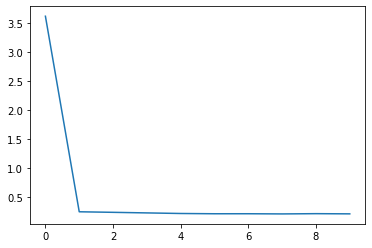

In [69]:
temp = [t.detach().cpu().numpy() for t in tlr]
arr = np.array(temp)
print(arr.shape)

plt.plot(arr)

In [70]:
if os.path.exists(os.getcwd()+'/model.pt'):
    print('Loading checkpoint: %s' % os.getcwd()+'/model.pt')
    path = torch.load(os.getcwd()+'/model.pt')
    epoch = path['epoch']
    model.load_state_dict(path['model'])
    optimizer.load_state_dict(path['optimizer'])

In [71]:
result = []
prediction = []
model.eval()
with torch.no_grad():
    for idx, (data, target) in enumerate(test_dataloader):
        output = model(data)
        output_sm = nn.Softmax(dim=1)(output)
        _, predicted = torch.max(output, 1)
        prediction.append(predicted)
        result.append(output_sm)
        
result = torch.stack(result).detach().cpu().numpy()
prediction = torch.stack(prediction).detach().cpu().numpy()

print(result.shape, prediction.shape)

(313, 64, 2) (313, 64)


In [72]:
print(prediction.reshape(-1).shape)

(20032,)


In [94]:
import pandas as pd
res = pd.DataFrame(result.reshape(-1,2))
pred = pd.DataFrame(prediction.reshape(-1))

res.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/results.csv", header=False, index=False)
pred.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/pred.csv", header=False, index=False)

In [95]:
print(res.shape, pred.shape)

(20032, 2) (20032, 1)


In [96]:
y_test_new = y_test[:result.reshape(-1,2).shape[0]]

In [97]:
print(y_test_new.shape)

(20032,)


In [98]:
result_df = pd.DataFrame({'ground truth': y_test_new, 'NN output': prediction.reshape(-1), 'probs 0': res[0], 'probs 1': res[1]})
result_df

ground truth  NN output   probs 0   probs 1
0               1.0          1  0.322326  0.677674
1               1.0          1  0.346601  0.653399
2               1.0          1  0.322326  0.677674
3               1.0          1  0.322326  0.677674
4               1.0          1  0.322326  0.677674
...             ...        ...       ...       ...
20027           0.0          0  0.999811  0.000189
20028           0.0          0  0.550736  0.449264
20029           0.0          0  0.999750  0.000250
20030           0.0          0  0.999747  0.000253
20031           0.0          0  0.995955  0.004045

[20032 rows x 4 columns]

In [99]:
# work out the accuracy and other metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = result_df['ground truth']
predicted = result_df['NN output']
# confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[0,1])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix_2 = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[10321   966]
 [  351  8394]]
Outcome values : 
 10321 966 351 8394
Classification report : 
 [[10321   966]
 [  351  8394]]


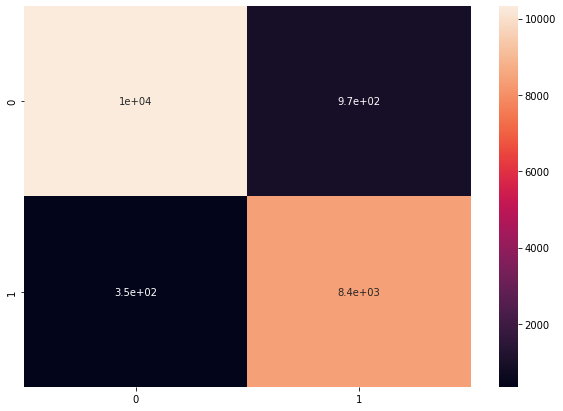

In [100]:
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [107]:

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
matrix = classification_report(actual,predicted,labels=[0,1], output_dict=True)
print('Classification report : \n',matrix)
accuracy_score(actual, predicted)

Classification report : 
 {'0': {'precision': 0.9671101949025487, 'recall': 0.9144148135022593, 'f1-score': 0.9400245912837562, 'support': 11287}, '1': {'precision': 0.8967948717948718, 'recall': 0.9598627787307032, 'f1-score': 0.9272576636288319, 'support': 8745}, 'accuracy': 0.9342551916932907, 'macro avg': {'precision': 0.9319525333487102, 'recall': 0.9371387961164812, 'f1-score': 0.933641127456294, 'support': 20032}, 'weighted avg': {'precision': 0.9364139338913349, 'recall': 0.9342551916932907, 'f1-score': 0.9344511696412685, 'support': 20032}}


0.9342551916932907

In [110]:
matrix_df = pd.DataFrame(matrix).transpose()

matrix_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report.csv", header=False, index=False)

# pd.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report.txt",matrix)
